# Rede Neural para Regressão - Student Habits vs Academic Performance (Dataset)

O data set escolhido analisa a relação entre hábitos de estudantes e seu desempenho acadêmico, incluindo variáveis como horas de estudo, sono, uso de redes sociais e atividades físicas. O objetivo é entender como esses fatores impactam as notas, verificando, por exemplo, se mais horas de sono ou menos tempo online melhoram os resultados.

O dataset "Student Habits vs Academic Performance" contém as seguintes colunas (variáveis), conforme a descrição disponível no Kaggle:

* student_id: Identificador único do estudante (ex: S1000, S1001)

* age: Idade do estudante (17-24 anos)

* gender: Gênero (Female, Male, Other)

* study_hours_per_day: Horas de estudo por dia (0.0-8.3)

* social_media_hours: Horas gastas em redes sociais por dia (0.0-6.2)

* netflix_hours: Horas gastas assistindo Netflix por dia (0.0-5.4)

* part_time_job: Se o estudante tem emprego de meio período (Yes/No)

* attendance_percentage: Porcentagem de frequência nas aulas (56.7-100.0)

* sleep_hours: Horas de sono por noite (3.2-10.0)

* diet_quality: Qualidade da dieta (Poor, Fair, Good)

* exercise_frequency: Frequência de exercícios por semana (0-6)

* parental_education_level: Nível educacional dos pais (None, High School, Bachelor, Master)

* internet_quality: Qualidade da conexão de internet (Poor, Average, Good)

* mental_health_rating: Autoavaliação da saúde mental (1-10)

* extracurricular_participation: Participação em atividades extracurriculares (Yes/No)

* exam_score: Pontuação no exame (18.4-100.0)

### **1. Instalação de Bibliotecas**

In [1]:
!pip install numpy pandas matplotlib scikit-learn tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from time import sleep
from tabulate import tabulate

### 2. Carregamento dos dados


In [8]:
def load_data(train_size=0.7, val_size=0.15):
    # Carregando o dataset de estudantes
    df = pd.read_csv('cleaned_student_performance.csv')
    
    # Pré-processamento dos dados
    if 'student_id' in df.columns:
        df = df.drop('student_id', axis=1)
    
    # Converter variáveis categóricas para numéricas
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    
    # Separar features e target
    X = df.drop('exam_score', axis=1).values
    y = df['exam_score'].values
    feature_names = df.drop('exam_score', axis=1).columns.tolist()

    # Criando índices aleatórios para separação
    n = len(X)
    indices = np.random.permutation(n)
    
    train_end = int(n * train_size)
    val_end = train_end + int(n * val_size)
    
    # Separando os dados
    X_train = X[indices[:train_end]]
    X_val = X[indices[train_end:val_end]]
    X_test = X[indices[val_end:]]
    
    y_train = y[indices[:train_end]]
    y_val = y[indices[train_end:val_end]]
    y_test = y[indices[val_end:]]

    # Normalizando os dados manualmente
    X_train_mean = X_train.mean(axis=0)
    X_train_std = X_train.std(axis=0)
    X_train_std[X_train_std == 0] = 1
    
    X_train = (X_train - X_train_mean) / X_train_std
    X_val = (X_val - X_train_mean) / X_train_std
    X_test = (X_test - X_train_mean) / X_train_std

    # Normalizando os valores de y (target)
    y_train_mean = y_train.mean()
    y_train_std = y_train.std()
    y_train = (y_train - y_train_mean) / y_train_std
    y_val = (y_val - y_train_mean) / y_train_std
    y_test = (y_test - y_train_mean) / y_train_std

    return X_train, X_val, X_test, y_train, y_val, y_test, y_train_mean, y_train_std, feature_names

In [9]:
print("Carregando e preparando os dados...")
X_train, X_val, X_test, y_train, y_val, y_test, y_train_mean, y_train_std, feature_names = load_data(train_size=0.7,val_size=0.15)
print(f"Dados carregados e normalizados:")
print(f"  - Treino: {len(X_train)} amostras")
print(f"  - Validação: {len(X_val)} amostras")
print(f"  - Teste: {len(X_test)} amostras")

Carregando e preparando os dados...
Dados carregados e normalizados:
  - Treino: 700 amostras
  - Validação: 150 amostras
  - Teste: 150 amostras


### 3. Exploração do dados

In [14]:
def exploracao_dados(X, y, feature_names, dataset_name="Dataset"):
    # Convertendo para DataFrame para fácil visualização
    df = pd.DataFrame(X, columns=feature_names)
    df["Target"] = y

    # Gráfico de distribuição dos dados de entrada (features)
    plt.figure(figsize=(16, 10))
    df.drop("Target", axis=1).hist(bins=20, grid=False, layout=(4, 4))
    plt.suptitle(f"Distribuição das Variáveis - {dataset_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()  # Exibe a figura (substitui o plt.close())

    # Gráfico de dispersão entre a variável target e as variáveis
    num_features = X.shape[1]
    rows = (num_features + 2) // 3  # Calcular o número de linhas necessárias

    plt.figure(figsize=(18, 5 * rows))
    for i in range(num_features):
        plt.subplot(rows, 3, i + 1)
        plt.scatter(df.iloc[:, i], df["Target"], alpha=0.5)
        plt.xlabel(f"{feature_names[i]}")
        plt.ylabel("Exam Score")
        plt.title(f"Relação entre {feature_names[i]} e Desempenho")

    plt.tight_layout()
    plt.show()  # Exibe a figura (substitui o plt.close())

<Figure size 1600x1000 with 0 Axes>

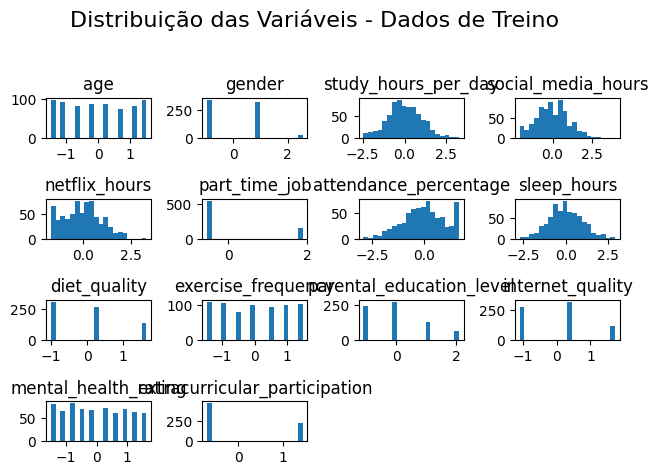

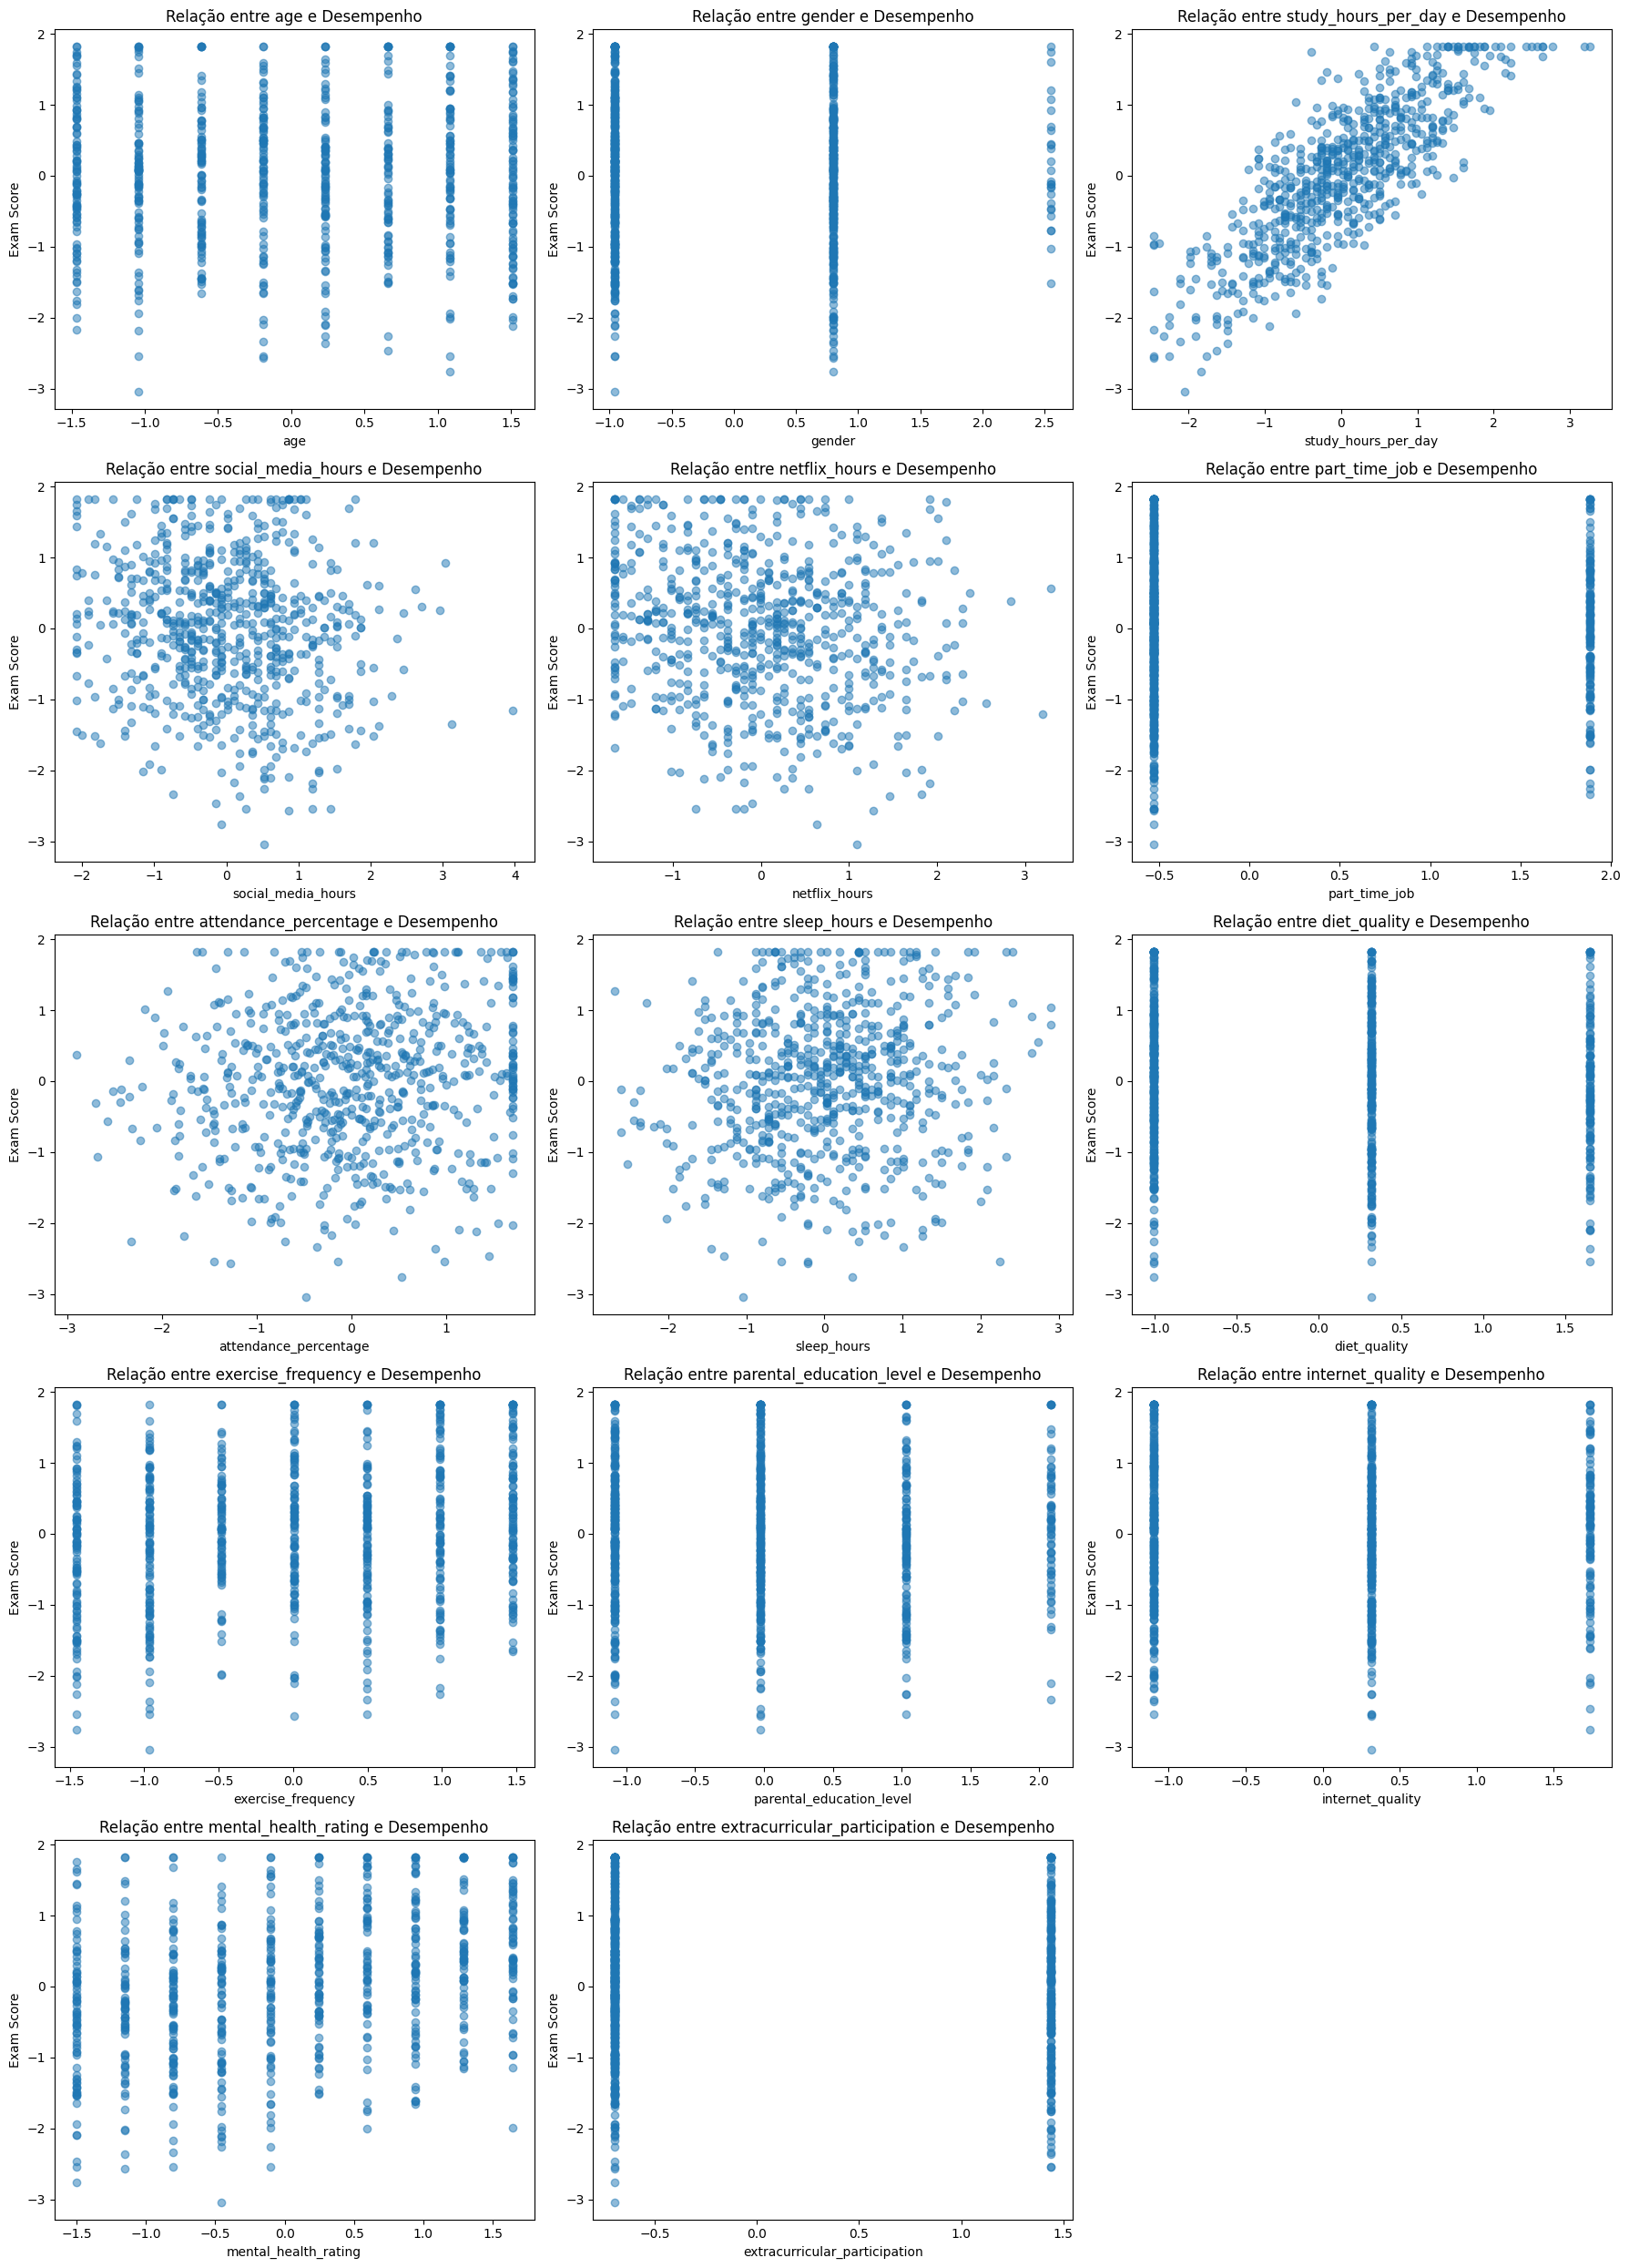

In [15]:
exploracao_dados(X_train, y_train, feature_names, "Dados de Treino")

### Rede Neural

In [ ]:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        # Inicialização de He melhorada
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))
        
        # Histórico para monitoramento
        self.loss_history = []
        self.val_loss_history = []
        self.best_weights = None
        self.best_loss = float('inf')

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def forward(self, X):
        # Camada oculta 1
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        
        # Camada oculta 2
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        
        # Camada de saída (sem ativação para regressão)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        return self.Z3

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        error = self.Z3 - y.reshape(-1, 1)
        
        # Gradientes da camada de saída
        dZ3 = error
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Gradientes da camada oculta 2
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Gradientes da camada oculta 1
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Atualização dos pesos
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3

    def compute_loss(self, y_pred, y_real):
        return np.mean((y_pred - y_real.reshape(-1, 1)) ** 2)

    def train_model(self, X_train, y_train, X_val, y_val, num_epochs=2000, 
                   learning_rate=0.01, patience=100, min_delta=0.001):
        print(f"Iniciando treinamento com {len(X_train)} amostras...")
        
        for epoch in range(num_epochs):
            # Forward e backward pass
            y_pred = self.forward(X_train)
            loss = self.compute_loss(y_pred, y_train)
            self.backward(X_train, y_train, learning_rate)
            
            # Cálculo da perda de validação
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(val_pred, y_val)
            
            # Armazenar histórico
            self.loss_history.append(loss)
            self.val_loss_history.append(val_loss)
            
            # Verificar melhoria e early stopping
            if val_loss < self.best_loss - min_delta:
                self.best_loss = val_loss
                self.best_weights = [
                    self.W1.copy(), self.b1.copy(),
                    self.W2.copy(), self.b2.copy(),
                    self.W3.copy(), self.b3.copy()
                ]
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    print(f"Early stopping na época {epoch} | Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")
                    self.restore_best_weights()
                    break
            
            # Log periódico
            if epoch % 100 == 0:
                print(f"Época {epoch:4d}/{num_epochs} | Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")

        print("Treinamento concluído!")
        self.plot_training_history()

    def restore_best_weights(self):
        if self.best_weights:
            self.W1, self.b1, self.W2, self.b2, self.W3, self.b3 = self.best_weights

    def predict(self, X):
        return self.forward(X)

    def plot_training_history(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.loss_history, label='Training Loss')
        plt.plot(self.val_loss_history, label='Validation Loss')
        plt.xlabel('Épocas')
        plt.ylabel('Loss (MSE)')
        plt.title('Evolução da Loss durante o Treinamento')
        plt.legend()
        plt.grid(True)
        plt.show() 


Inicializando a rede neural...

Iniciando o treinamento...
Iniciando treinamento com 700 amostras...
Época    0/3000 | Loss: 4.3835 | Val Loss: 1.6082
Época  100/3000 | Loss: 0.1854 | Val Loss: 0.2634
Época  200/3000 | Loss: 0.1304 | Val Loss: 0.2124
Época  300/3000 | Loss: 0.1065 | Val Loss: 0.1927
Época  400/3000 | Loss: 0.0925 | Val Loss: 0.1829
Época  500/3000 | Loss: 0.0825 | Val Loss: 0.1776
Época  600/3000 | Loss: 0.0749 | Val Loss: 0.1747
Época  700/3000 | Loss: 0.0689 | Val Loss: 0.1726
Época  800/3000 | Loss: 0.0641 | Val Loss: 0.1713
Época  900/3000 | Loss: 0.0601 | Val Loss: 0.1703
Época 1000/3000 | Loss: 0.0565 | Val Loss: 0.1696
Época 1100/3000 | Loss: 0.0534 | Val Loss: 0.1690
Época 1200/3000 | Loss: 0.0507 | Val Loss: 0.1686
Early stopping na época 1294 | Loss: 0.0483 | Val Loss: 0.1687
Treinamento concluído!


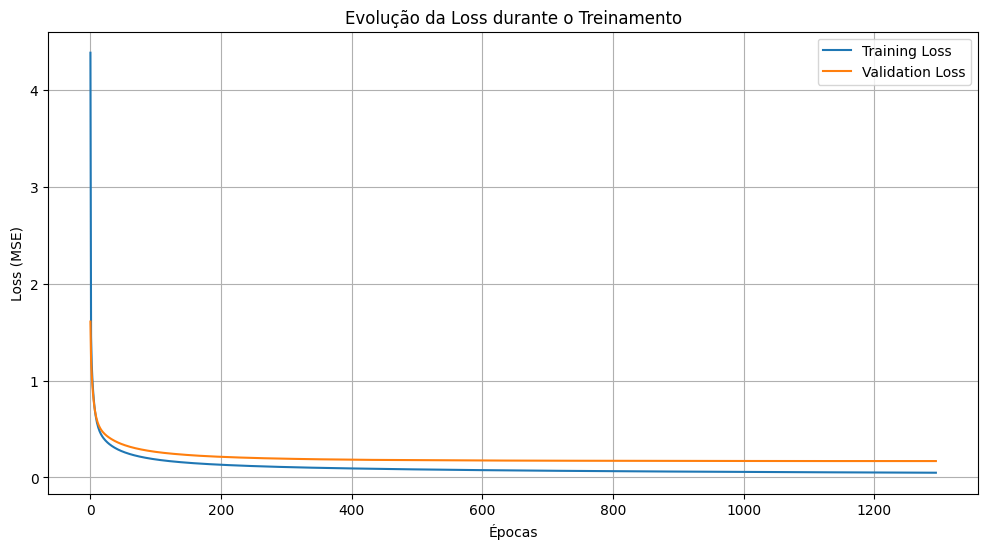

Treinamento finalizado.


In [17]:
print("\nInicializando a rede neural...")
input_size = X_train.shape[1]  # Número de características
hidden_size1 = 128  # Primeira camada oculta
hidden_size2 = 64   # Segunda camada oculta
output_size = 1     # Saída única para regressão
    
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
    
# 3. Treinar o modelo
print("\nIniciando o treinamento...")
num_epochs = 3000
learning_rate = 0.02
training_patient = 150  # Paciência para early stopping

model.train_model(
    X_train, y_train,
    X_val, y_val,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    patience=training_patient,
    min_delta=0.0005
)
print("Treinamento finalizado.")

### Avaliação do Modelo

In [23]:
def evaluate_model(X_test, y_test, model, y_train_mean, y_train_std):
    print("\nAvaliando o modelo...")
    
    # 1. Fazer previsões
    y_pred = model.predict(X_test)
    
    # 2. Desnormalizar valores
    y_pred_denorm = y_pred.flatten() * y_train_std + y_train_mean
    y_test_denorm = y_test * y_train_std + y_train_mean
    
    # 3. Calcular métricas
    errors = y_test_denorm - y_pred_denorm
    abs_errors = np.abs(errors)
    
    mae = np.mean(abs_errors)
    mse = np.mean(errors**2)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum(errors**2) / np.sum((y_test_denorm - np.mean(y_test_denorm))**2))
    
    # 4. Exibir métricas em tabela
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    
    print("\nMétricas de Desempenho:")
    metrics_df = pd.DataFrame(list(metrics.items()), columns=['Métrica', 'Valor'])
    print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))
    
    # 5. Gerar e exibir visualizações
    
    # a. Gráfico de dispersão: Valores Reais vs Preditos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_denorm, y_pred_denorm, alpha=0.5, label='Dados')
    plt.plot([y_test_denorm.min(), y_test_denorm.max()], 
             [y_test_denorm.min(), y_test_denorm.max()], 
             'r--', lw=2, label='Linha de Referência (y=x)')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title('Valores Reais vs. Valores Preditos')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # b. Histograma de erros
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Erro Zero')
    plt.xlabel('Erro de Predição (Real - Predito)')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos Erros de Predição')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # c. Análise adicional de erros
    print("\nAnálise Detalhada dos Erros:")
    print(f"- Erro médio absoluto: {mae:.2f}")
    print(f"- Maior superestimação: {errors.max():.2f}")
    print(f"- Maior subestimação: {errors.min():.2f}")
    print(f"- % de previsões com erro ≤ {mae:.2f}: {np.sum(abs_errors <= mae)/len(abs_errors)*100:.1f}%")
    
    return metrics


Avaliando o modelo no conjunto de teste...

Avaliando o modelo...

Métricas de Desempenho:
+---------+--------------------+
| Métrica |       Valor        |
+---------+--------------------+
|   MAE   | 6.072236346320873  |
|   MSE   |  55.9321026667662  |
|  RMSE   | 7.478776816215751  |
|   R²    | 0.8043895199023883 |
+---------+--------------------+


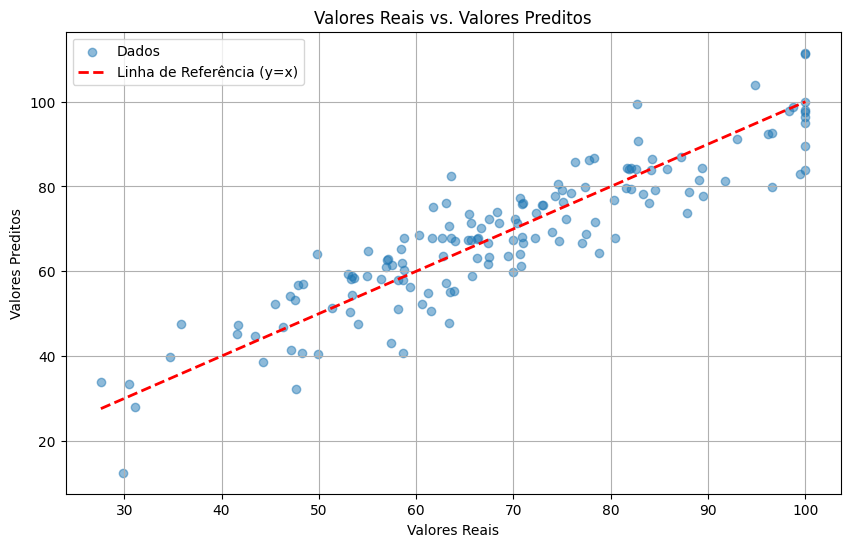

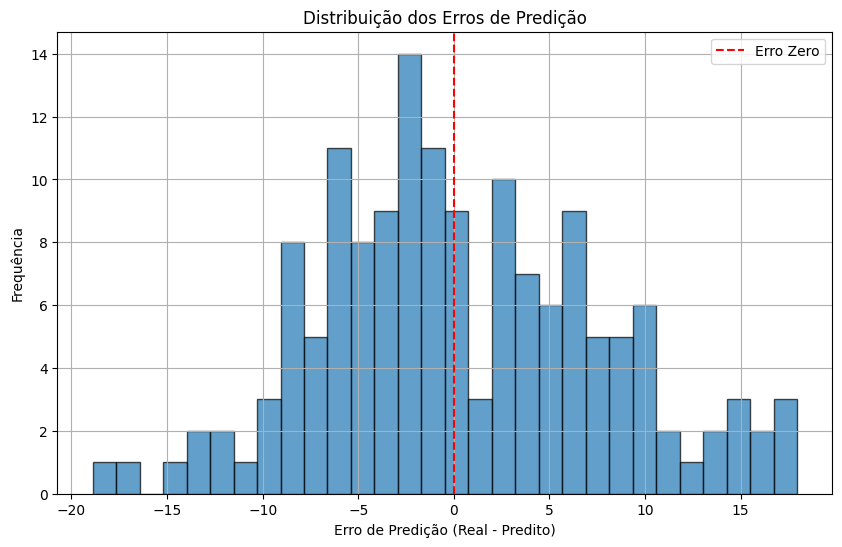


Análise Detalhada dos Erros:
- Erro médio absoluto: 6.07
- Maior superestimação: 17.96
- Maior subestimação: -18.89
- % de previsões com erro ≤ 6.07: 59.3%

R² do modelo: 0.804


In [27]:
print("\nAvaliando o modelo no conjunto de teste...")
sleep(2)
metrics = evaluate_model(X_test, y_test, model, y_train_mean, y_train_std)
print(f"\nR² do modelo: {metrics['R²']:.3f}")